In [1]:
from pynq import Overlay

base = Overlay('onboard.bit')

In [2]:
mem = base.axi_bram_ctrl_1
rst_rv = base.axi_gpio_0

In [3]:
base.load_ip_data('axi_bram_ctrl_1', 'main.bin')

In [4]:
rst_rv.channel1.write(1, 0x1)

In [14]:
from pynq import allocate
input_buffer = allocate(shape=(4095,), dtype='u4')

In [15]:
dma = base.axi_dma_0.recvchannel

In [16]:
dma.transfer(input_buffer)
dma.wait()

In [21]:
hex(input_buffer[0])

'0x40000'

In [22]:
t = [0]
for i in input_buffer:
    a = i & 0xffff;
    b = i >> 16;
    if(a != 0):
        t.append(a)
    if(b != 0):
        t.append(b)

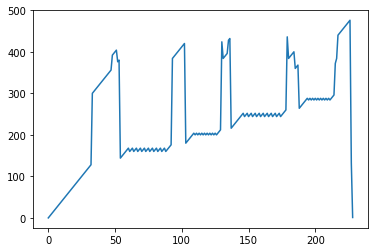

In [25]:
import matplotlib.pyplot as plt
plt.plot(t)
plt.show()